In [2]:
import cv2
print(cv2.__version__)

import numpy as np
from matplotlib import pyplot as plt
import time

# Only for jupyter notebook visualization
%matplotlib inline 

4.4.0


In [4]:
image = cv2.imread('/home/lorenzo/map.png')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [5]:
print(image.shape)

# Printing height width and channels separately
height = image.shape[0]
width = image.shape[1]
ch = image.shape[2]

print("The Height is:",height)
print("The Width is: ",width)
print("The Number of Channels is: ",ch)

(384, 832, 3)
The Height is: 384
The Width is:  832
The Number of Channels is:  3


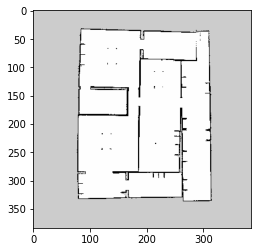

In [24]:
plt.imshow(image_rgb)
plt.show()

In [4]:
R = image_rgb[:,:,0] # Getting the first axis, Red
G = image_rgb[:,:,1] # Getting the second axis, Green
B = image_rgb[:,:,2] # Getting the third axis, Blue

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)

(384, 384) (384, 384) (384, 384)


In [5]:
min_value = 250
image_rgb[image_rgb[:,:,0] < min_value] = 0
image_rgb[image_rgb[:,:,1] < min_value] = 0
image_rgb[image_rgb[:,:,2] < min_value] = 0

    
    
    

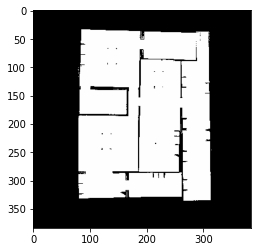

In [6]:
plt.imshow(image_rgb)
plt.show()

In [36]:
cv2.imwrite("/home/lorenzo/map_black.png", image_rgb)

True

Resized Dimensions :  (96, 96, 3)


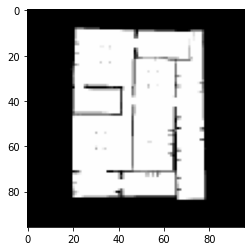

In [7]:
scale_percent = 25 # percent of original size (from 0.05 to 0.2 pixel)
width = int(image_rgb.shape[1] * scale_percent / 100)
height = int(image_rgb.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(image_rgb, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(resized)
plt.show()

In [8]:
min_value = 250
resized[resized[:,:,0] < min_value] = 0
resized[resized[:,:,1] < min_value] = 0
resized[resized[:,:,2] < min_value] = 0


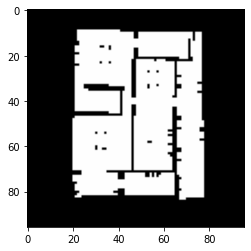

In [9]:
plt.imshow(resized)
plt.show()

In [32]:
cv2.imwrite("/home/lorenzo/map_black_resized.png", resized)

True

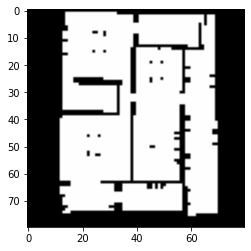

In [10]:
resized = resized[8:8+80,8:8+80] # transformation to preserve the box shape, original image is 96x96, cropped one is 88x88
plt.imshow(resized)
plt.show()

In [34]:
cv2.imwrite("/home/lorenzo/map_black_resized.png", resized)

True

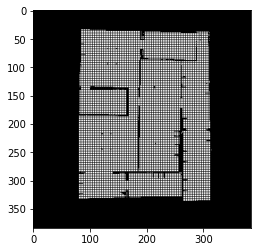

True

In [49]:
image_rgb_cp = np.copy(image_rgb)

GRID_SIZE = 4

height, width, channels = image_rgb_cp.shape
for x in range(0, width -1, GRID_SIZE):
     cv2.line(image_rgb_cp, (x, 0), (x, height), (0, 0, 0), 1, 1)
for y in range(0, height -1, GRID_SIZE):
     cv2.line(image_rgb_cp, (0,y), (width,y), (0, 0, 0), 1, 1)
        
plt.imshow(image_rgb_cp)
plt.show()

cv2.imwrite("/home/lorenzo/map_black_resized_grid.png", image_rgb_cp)

In [14]:
x_pos = -3.0
y_pos = -2.0

x_pixel = 80 # number of pixels
y_pixel = 80
resolution = 0.2 # meters/pixel

# Coordinate transformation from image [m] to image [pixel]
x_px = -y_pos/resolution + (x_pixel/2)
y_px = -x_pos/resolution + (y_pixel/2)

x_px = round(x_px) # round to nearest integer
y_px = round(y_px)

print(x_px)
print(y_px)

50
55


## Room detection

Original image:

(384, 384, 3)


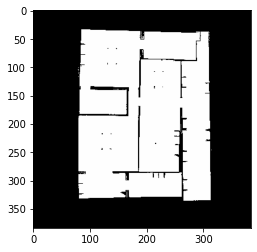

In [2]:
image = cv2.imread('/home/lorenzo/map_black.png')
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image_rgb)
plt.show()
# convert the image to grayscale format
img_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

Read the image and performe **erosion** followed by **dilation** to "separate" the rooms:

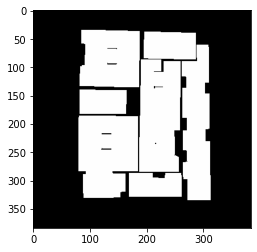

True

In [4]:
image = cv2.imread('/home/lorenzo/map_black.png')
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img_gray,kernel,iterations = 10)
dilate = cv2.dilate(erosion,kernel,iterations = 10)

plt.imshow(dilate, cmap='gray', vmin=0, vmax=255)
plt.show()

#cv2.imwrite("/home/lorenzo/map_dil_er.png", dilate)

Detect **contours** of the image:

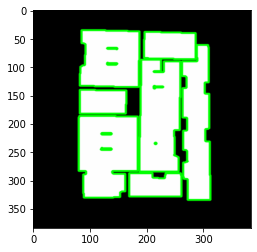

True

In [5]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=dilate, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_copy = dilate.copy()
image_rgb = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
image_rgb_copy = image_rgb.copy()
cv2.drawContours(image=image_rgb_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_rgb_copy)
plt.show()

#cv2.imwrite("/home/lorenzo/map_contours.png", image_rgb_copy)

For every contour find the **bounding rectangle** and verify that the area is > than a treshold in order to consider only the rooms and discard tables legs. Print how many rooms were detected:

ROOMS DETECTOR ALGORITHM


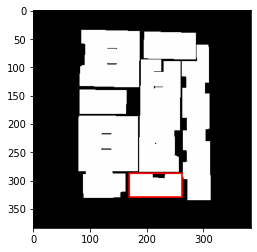

169 287
1


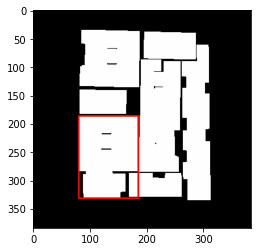

80 186
2


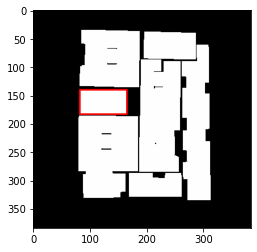

82 140
3


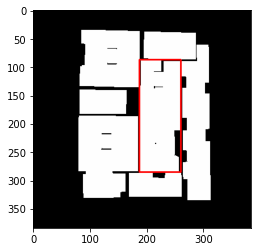

187 87
4


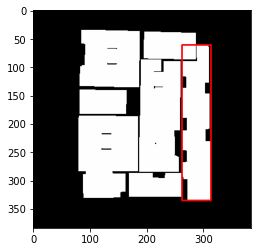

262 61
5


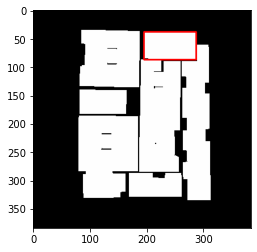

195 38
6


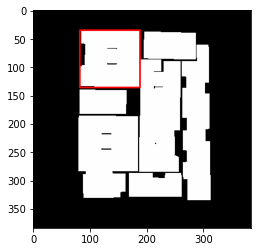

82 35
7
In this house I found 7 rooms.


In [9]:
print("ROOMS DETECTOR ALGORITHM")
n_rooms = 0
for contour in contours: 
    x,y,w,h = cv2.boundingRect(contour) # x,y top-left coordinate of the rectangle and w,h be its width and height
    area = w*h
    if area > 150:
        n_rooms+=1
        image_copy = image_rgb.copy()
        cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),2)
        plt.imshow(image_copy)
        plt.show()
        print(x,y)
        print(n_rooms)
        #room_name=str(n_rooms)
        #room_n="/home/lorenzo/"+room_name+".png"
        #cv2.imwrite(room_n, image_copy)

print("In this house I found", n_rooms, "rooms.")    
#plt.imshow(image_rgb)
#plt.show()